In [ ]:
import pandas as pd
import numpy as np
import os

from PIL import Image

In [ ]:
#上限表示数を拡張
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 6000)

In [ ]:
INPUT = "/content/drive/MyDrive/nishika"
train_df = pd.read_csv(os.path.join(INPUT, "train.csv"))
test_df = pd.read_csv(os.path.join(INPUT, "test.csv"))

In [ ]:
train_image_path = "/content/drive/MyDrive/nishika/train/"
test_image_path = "/content/drive/MyDrive/nishika/test/"

In [ ]:
gpt_np = np.load("/content/drive/MyDrive/nishika/output/test_prediction_full0.npy")

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/nishika/sub/sub93.csv')

df_2 = pd.read_csv('/content/drive/MyDrive/nishika/sub/sub94.csv')

df_4 = pd.read_csv('/content/drive/MyDrive/nishika/sub/sub100.csv')

df_5 = pd.read_csv('/content/drive/MyDrive/nishika/sub/sub101.csv')

In [ ]:
from scipy.special import softmax

In [ ]:
m = softmax(gpt_np, axis=1)

In [ ]:
print(m)

In [ ]:
arg = np.max(m,axis=1)

In [ ]:
print(arg)

In [ ]:
df_3 = pd.DataFrame(arg)

In [ ]:
df_3 = df_3.rename(columns={0: 'gpt_laugh'})

In [ ]:
df_1["sa"] = df_2["is_laugh"] - df_1["is_laugh"]

In [ ]:
import matplotlib.pyplot as plt

(array([  24.,  113.,  383., 1013., 1532., 1510.,  938.,  369.,   99.,
          19.]),
 array([-0.27823531, -0.22245104, -0.16666678, -0.11088252, -0.05509825,
         0.00068601,  0.05647028,  0.11225454,  0.16803881,  0.22382307,
         0.27960734]),
 <a list of 10 Patch objects>)

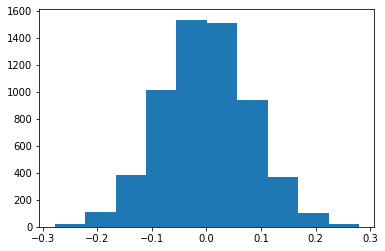

In [ ]:
plt.hist(x=df_1.sa)       

In [ ]:
diff= df_1["sa"].abs()

In [ ]:
df_1 = pd.concat([df_1,df_3],axis=1)

In [ ]:
df_1["new_laugh"] = df_1["gpt_laugh"].where(diff>0.2, df_1["is_laugh"])

In [ ]:
big_diff = diff[diff>0.2]

In [ ]:
big_diff.sort_values(ascending=True)

974     0.200682
5915    0.201361
33      0.201647
1743    0.201688
106     0.202038
323     0.203637
131     0.203852
3931    0.204013
5952    0.204530
3344    0.204675
3705    0.204734
3767    0.204753
930     0.204963
3559    0.205339
5265    0.205361
5775    0.206157
4719    0.206256
228     0.207318
3926    0.207424
2795    0.207472
5478    0.207773
3125    0.208148
3713    0.208345
2879    0.208462
2196    0.208739
1907    0.208954
1783    0.210306
2351    0.213136
4848    0.213386
1301    0.213626
5414    0.213911
5379    0.213989
1077    0.214491
324     0.214627
4301    0.214770
2209    0.217160
5274    0.217486
2872    0.217863
592     0.218540
1915    0.219139
4661    0.219553
3718    0.220912
1814    0.220983
3557    0.221105
2464    0.221866
3788    0.223202
4023    0.223589
2672    0.224592
3964    0.225189
1306    0.225503
5266    0.225534
4578    0.225720
964     0.226103
3068    0.226879
5472    0.227595
4116    0.228198
1140    0.229686
124     0.229765
869     0.2297

In [ ]:
df = pd.DataFrame({"df_1":df_1['is_laugh'],
                  "df_2":df_2['is_laugh'],
                   "df_4":df_4['is_laugh'],
                    "df_5":df_5['is_laugh'],
                 })

# 相関行列
df.corr()

,df_1,df_2,df_4,df_5
df_1,1.000000,0.877209,0.985888,0.873612
df_2,0.877209,1.000000,0.871200,0.984474
df_4,0.985888,0.871200,1.000000,0.867171
df_5,0.873612,0.984474,0.867171,1.000000


In [ ]:
# 予測値の多数決
sum_pred = df_1["is_laugh"]*0.45 + df_2["is_laugh"]*0.2 + df_4["is_laugh"]*0.25+ df_5["is_laugh"]*0.1
ensemble = pd.DataFrame({"id": df_1["id"], "is_laugh":sum_pred})
ensemble.to_csv("sub.csv", index=False)

In [ ]:
# データ内にあるボケてを確認してみる

fig = plt.figure(figsize=(15,7))

image_path1 = test_image_path + test_df.iloc[592]["odai_photo_file_name"]
img1 = img = Image.open(image_path1)

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)

image_path2 = test_image_path + test_df.iloc[1915]["odai_photo_file_name"]
img2 = img = Image.open(image_path2)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)

plt.show()

In [ ]:
print(test_df["text"][592])

In [ ]:
print(test_df["text"][1915])